In [17]:
import pandas as pd

# downloaod csv from https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_positive_cases_by_municipality.csv
data = pd.read_csv('data/130001_tokyo_covid19_positive_cases_by_municipality.csv', parse_dates = ['公表_年月日', ], low_memory=False)

In [18]:
data = data[(data['公表_年月日'] >= '2021-04-01') & (data['公表_年月日'] < '2021-09-01')]
data = data[data['市区町村名'].str.contains('.*区$', na=False)]

daily = data.groupby(['公表_年月日', "市区町村名"], as_index=False).agg({'陽性者数': lambda x: x})
daily = daily.rename(columns={'size': 'count'})


<AxesSubplot:xlabel='公表_年月日'>

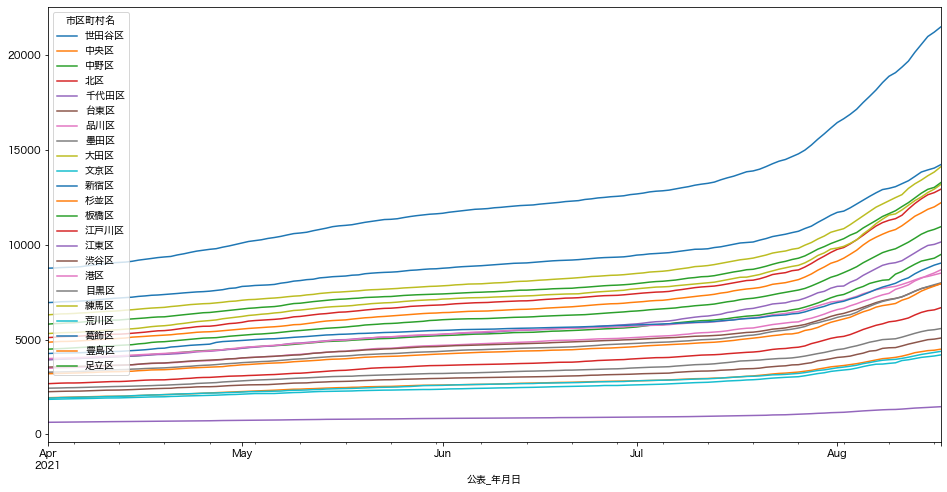

In [19]:
count_df = pd.pivot_table(daily, index='公表_年月日', columns='市区町村名', values='陽性者数', aggfunc=sum, dropna=False)
count_df.plot(figsize=(16, 8))

In [20]:
# ref. `第１表` https://www.toukei.metro.tokyo.lg.jp/juukiy/2021/jy21000001.htm

population_dict = {
    '千代田区': 	67216,
    '中央区': 		170583,
    '港区': 			259036,
    '新宿区': 		345231,
    '文京区': 		226574,
    '台東区': 		203647,
    '墨田区': 		275647,
    '江東区': 		526301,
    '品川区': 		406404,
    '目黒区': 		281317,
    '大田区': 		733672,
    '世田谷区': 	920372,
    '渋谷区': 		230506,
    '中野区': 		334632,
    '杉並区': 		573504,
    '豊島区': 		287300,
    '北区': 			353158,
    '荒川区': 		216535,
    '板橋区': 		570213,
    '練馬区': 		740099,
    '足立区': 		691002,
    '葛飾区': 		463691,
    '江戸川区': 	696123,
}

In [21]:
def calc_percent(x):
    return float(x['陽性者数']/population_dict[x['市区町村名']]*100)

daily['positive_rate'] = daily.apply(calc_percent, axis='columns').to_frame()


<AxesSubplot:xlabel='公表_年月日'>

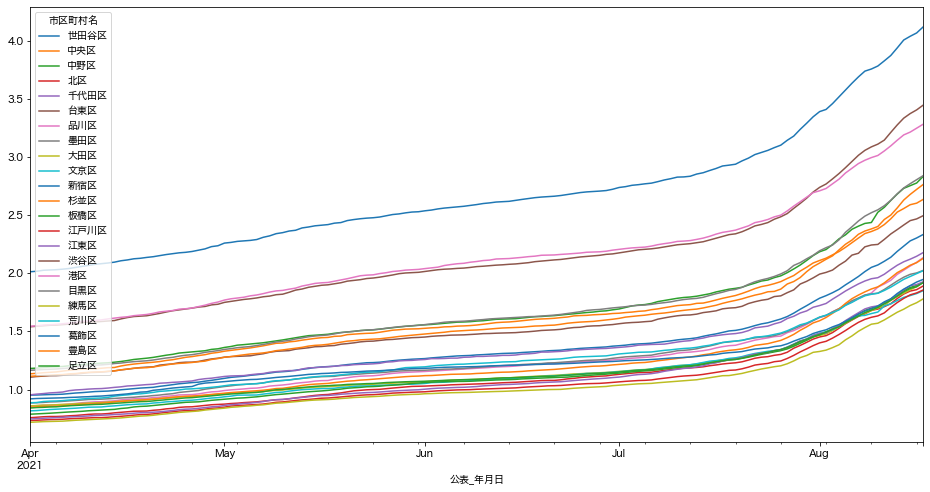

In [22]:
rate_df = pd.pivot_table(daily, index='公表_年月日', columns='市区町村名', values='positive_rate', aggfunc=sum, dropna=False)
rate_df.plot(figsize=(16, 8))